In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)


In [2]:
#data cleaning

In [3]:
df1=pd.read_csv('bangaluru house.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby('area_type')['area_type'].agg('count')


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 5)

In [10]:
#feature engineering

In [11]:
df3['size'].unique() 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0])) #bhk=number of bedrooms

/var/folders/lk/hd8yqfgs6yl2zfq0c0mxnhl80000gn/T/ipykernel_9116/2920148604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0])) #bhk=number of bedrooms


In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
 df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df4 = df3.copy()
df4['total_sqft'] = pd.to_numeric(df4['total_sqft'], errors='coerce')
df4['price_per_sqft'] = df4['price'] * 100000 / df4['total_sqft']
df4.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [16]:
len(df4.location.unique())

1304

In [17]:
location_count = df4['location'].value_counts()
df4['location'] = df4['location'].apply(lambda x: 'other' if location_count[x] < 10 else x)
len(df4.location.unique())


254

In [18]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
#outlier detection


In [20]:
df4[df4.total_sqft/df4.bhk<300].head() #checking for outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [21]:
df4.shape

(13246, 7)

In [22]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [23]:
df5.price_per_sqft.describe()

count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
25%        4208.545855
50%        5300.000000
75%        6938.987948
max      176470.588235
Name: price_per_sqft, dtype: float64

In [24]:
import numpy as np

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])  # Corrected to standard deviation
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - st)) & 
                           (subdf['price_per_sqft'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out  # Return statement moved outside the loop

df6 = remove_pps_outliers(df5)
df6.shape


(10125, 7)

In [25]:
12502-10125 #therefore 2377 outliers were removed

2377

In [26]:
#plotting data

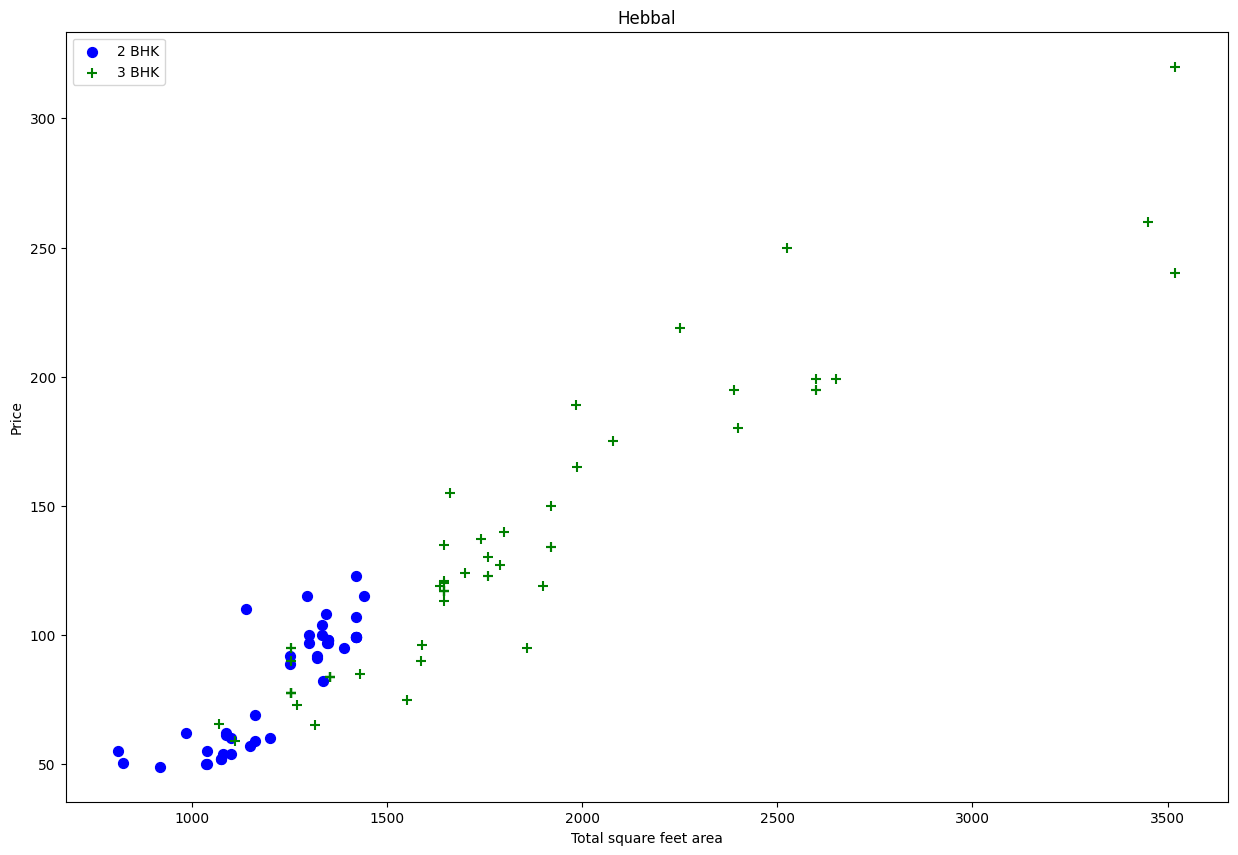

In [27]:

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()
plot_scatter_chart(df6,"Hebbal")

In [28]:
#removing outliers 
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values
                )
    return df.drop(exclude_indices, axis='index')

df7 = remove_bhk_outlier(df6)
df7.shape

(7269, 7)

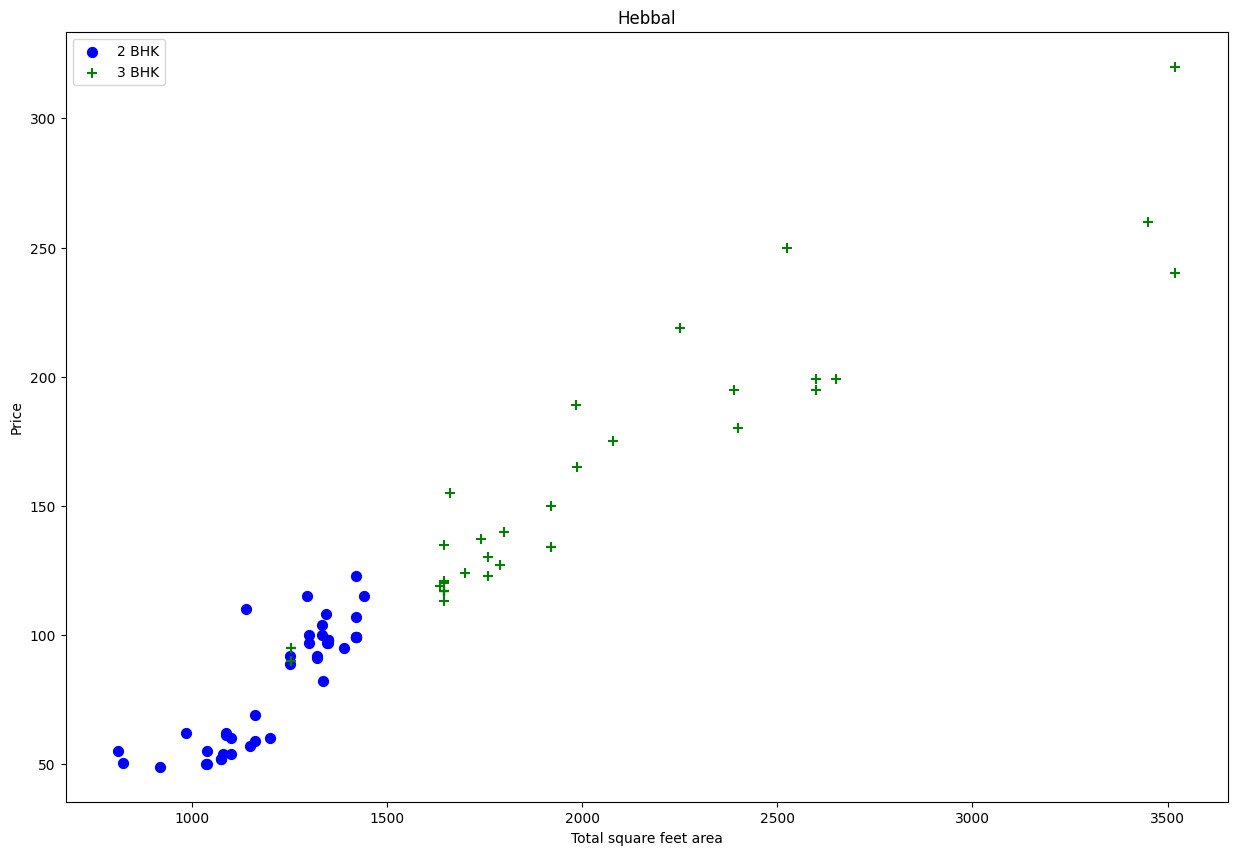

In [29]:
plot_scatter_chart(df7,'Hebbal')

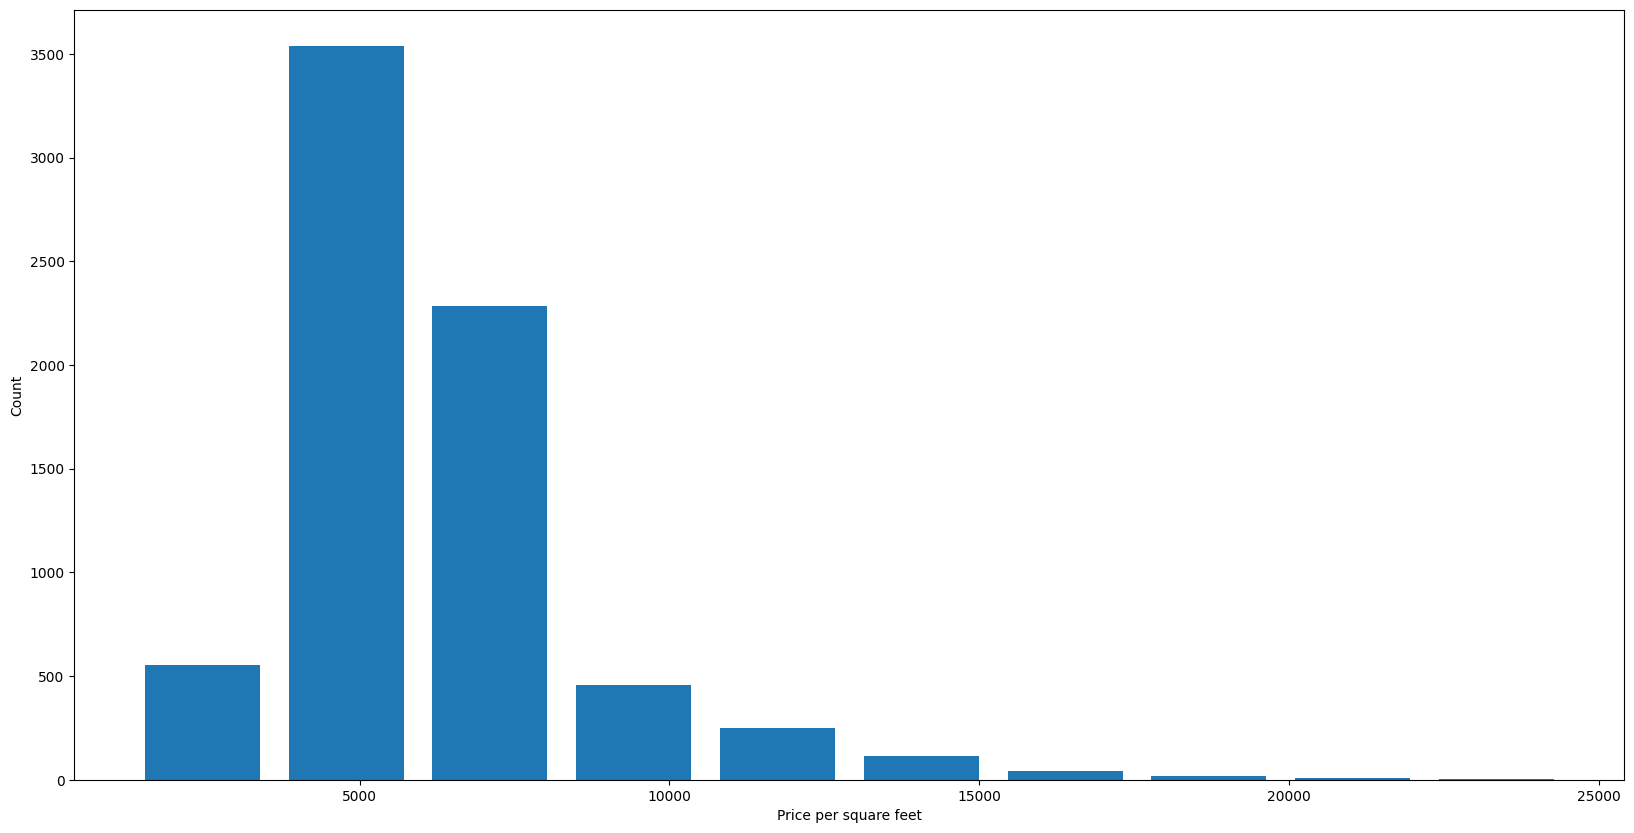

In [30]:
import matplotlib 
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')
plt.show()

In [31]:
df7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [32]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
595,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5282,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8441,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8527,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9229,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9543,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [33]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
595,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1638,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5243,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6706,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8369,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [34]:
df8=df7[df7.bath<df7.bhk+2]
df8.shape

(7196, 7)

In [35]:
df9=df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(15)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
6,Devarachikkanahalli,1130.0,2.0,36.0,2
7,Devarachikkanahalli,1417.0,2.0,76.0,3
8,Devarachikkanahalli,1230.0,2.0,58.0,2
9,Devarachikkanahalli,1705.0,3.0,75.0,3
10,Devarachikkanahalli,1116.0,2.0,47.0,2


In [36]:
print(df9['location'].isnull().sum())  # Check for nulls
df9['location'].fillna('Unknown', inplace=True)  # Replace nulls if any


0


/var/folders/lk/hd8yqfgs6yl2zfq0c0mxnhl80000gn/T/ipykernel_9116/1290281521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df9['location'].fillna('Unknown', inplace=True)  # Replace nulls if any


In [37]:
print(df9['location'].dtype) 
print(df9['location'].apply(type).unique())  


object
[<class 'str'>]


In [38]:
dummies = pd.get_dummies(df9['location'], prefix='location').astype(int)
print(dummies.head())


   location_ Devarachikkanahalli  location_1st Block Jayanagar  \
1                              1                             0   
2                              1                             0   
3                              1                             0   
4                              1                             0   
5                              1                             0   

   location_1st Block Koramangala  location_1st Phase JP Nagar  \
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
5                               0                            0   

   location_2nd Phase Judicial Layout  location_2nd Stage Nagarbhavi  \
1                                   0                              0   
2                                   0                         

In [39]:
dummies = pd.get_dummies(df9['location'], prefix='', prefix_sep='').astype(int)
print(dummies.head())


    Devarachikkanahalli  1st Block Jayanagar  1st Block Koramangala  \
1                     1                    0                      0   
2                     1                    0                      0   
3                     1                    0                      0   
4                     1                    0                      0   
5                     1                    0                      0   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   
5                   0                          0                     0   

   5th Block Hbr Layout  5th Phase JP Nagar  6th Phase JP Nagar  \
1                     0                   0                  

In [40]:
df10=pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head(15)

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Devarachikkanahalli,1130.0,2.0,36.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Devarachikkanahalli,1417.0,2.0,76.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Devarachikkanahalli,1230.0,2.0,58.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Devarachikkanahalli,1705.0,3.0,75.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Devarachikkanahalli,1116.0,2.0,47.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df11=df10.drop('location',axis='columns')
df11.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df11.shape

(7196, 257)

In [43]:
X=df11.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y=df11.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [46]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8659848869427711

In [47]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.86598489, 0.84331974, 0.88953388, 0.79591407, 0.85809376])

In [48]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

def find_best_model_using_gridsearch(X, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'params': {
                'regressor__fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=11)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearch(X, y)

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packages/

,model,best_score,best_params
0,linear_regression,0.829888,{'regressor__fit_intercept': True}
1,lasso,0.671407,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.632500,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [72]:
def predict_price(location, sqft, bath, bhk):
    try:
        loc_index = np.where(X.columns == location)[0][0]  
    except IndexError:
       
        print(f"Location '{location}' not found in the model's columns.")
        return None 

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]


In [73]:
predict_price('1st Phase JP Nagar',1000,2,2)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.20584395639449

In [74]:
#therefore it means a property with 1000 square feet,2 bath rooms and 2 bed rooms in 1st Phase JP Nagar is worth 80.2058 lakhs

In [75]:
predict_price('Indira Nagar',1000,3,4)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


173.58146591286447

In [76]:
import pickle 
with open('bengaluru_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [77]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
    
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [78]:
from sklearn.linear_model import LinearRegression
import joblib



bengaluru_home_prices_model = LinearRegression()
bengaluru_home_prices_model.fit(X, y)


joblib.dump(bengaluru_home_prices_model, 'bengaluru_home_prices_model.pkl')


['bengaluru_home_prices_model.pkl']

In [79]:

columns = df11.columns
print(columns)


Index(['total_sqft', 'bath', 'price', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)


In [80]:
import pandas as pd

# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Now print the column names
print(df11.columns)


Index(['total_sqft', 'bath', 'price', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)


In [83]:
# Save the column names into a text file
with open('columns_list.txt', 'w') as f:
    for column in df11.columns:
        f.write(f"{column}\n")
